In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import trange
import glob,os
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4922529935232881063,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 23309352960
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16682109008604336461
 physical_device_desc: "device: 0, name: GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"]

In [2]:
def plot_samples(model,size):
    z = tf.random.normal([size**2,latent_dim])
    images = tf.reshape(model(z,training=False),[-1,28,28])
    fig = plt.figure(figsize=(size,size))
    for i in range(size**2):
        plt.subplot(size,size,i+1)
        plt.imshow(images[i]*127.5+127.5, cmap = 'gray')
        plt.axis('off')
    plt.show()
    plt.pause(0.05)

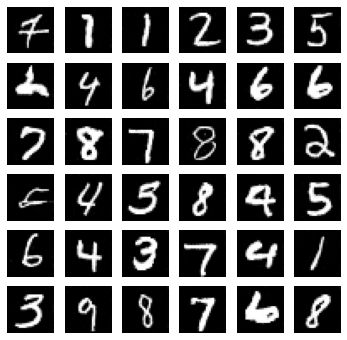

In [3]:
generator = tf.keras.models.load_model('models/resnet/generator')
latent_dim = 128
plot_samples(generator,6)

In [40]:
from numpy import asarray
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from numpy import arccos
from numpy import clip
from numpy import dot
from numpy import sin
from numpy import linspace
from numpy.linalg import norm
import matplotlib.pyplot as plt
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input
 
# spherical linear interpolation (slerp)
def slerp(val, low, high):
    omega = arccos(clip(dot(low/norm(low), high/norm(high)), -1, 1))
    so = sin(omega)
    if so == 0:
        # L'Hopital's rule/LERP
        return (1.0-val) * low + val * high
    return sin((1.0-val)*omega) / so * low + sin(val*omega) / so * high
 
# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = slerp(ratio, p1, p2)
        vectors.append(v)
    return asarray(vectors)

# create a plot of generated images
def plot_generated(examples, n):
    # plot images
    fig = plt.figure(figsize=(10,10))
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i, :, :],cmap='gray')
    plt.savefig('mnist_slerp.png')
    plt.pause(0.05)

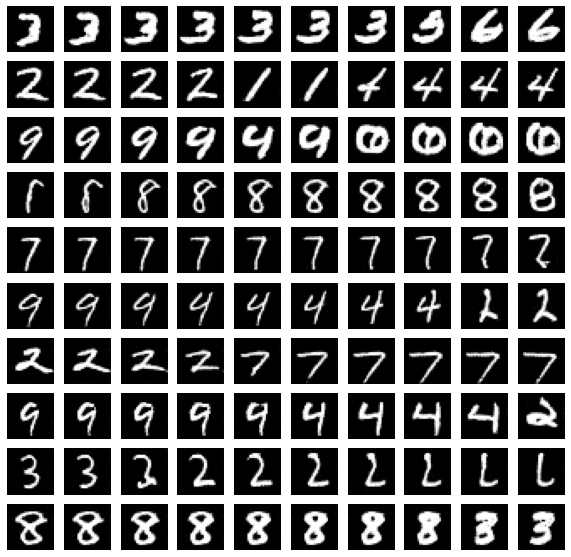

In [45]:
n = 20
pts = tf.random.normal([n,latent_dim])
# interpolate pairs
results = None
for i in range(0, n, 2):
    # interpolate points in latent space
    interpolated = interpolate_points(pts[i], pts[i+1])
    X = generator(interpolated)
    X = X*127.5+127.5
    if results is None:
        results = X
    else:
        results = vstack((results, X))

plot_generated(results, 10)